In [1]:
import cv2
from IPython.display import HTML
# the following import statement takes care of all that we need for using YOLO v3
from Yolov3 import *

In [2]:
yolo = YOLOv3()

/Users/anner/Code/miniconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/Users/anner/Code/miniconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


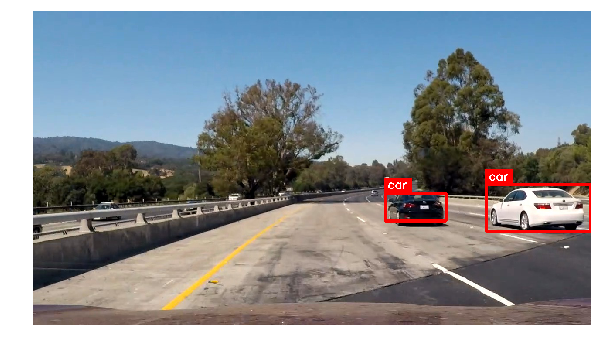

In [3]:
# Example for single images
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

img     = cv2.imread('test_video_37.jpg')
ann_img = yolo.inference(img)
show(ann_img[:, :, ::-1])

### Video annotation

In [ ]:
# Setting up a lot of meta data
vid_in    = cv2.VideoCapture('videos/project_video.mp4')
vid_len   = int(vid_in.get(cv2.CAP_PROP_FRAME_COUNT))
vid_W     = int(vid_in.get(cv2.CAP_PROP_FRAME_WIDTH))
vid_H     = int(vid_in.get(cv2.CAP_PROP_FRAME_HEIGHT))
vid_fps   =     vid_in.get(cv2.CAP_PROP_FPS)
vid_ind   = 1

# Initialize video writer
fourcc    = cv2.VideoWriter_fourcc(*'avc1')
vid_out   = cv2.VideoWriter('videos/project_video_YOLOv3.mp4', fourcc, vid_fps, (vid_W, vid_H))

while(vid_in.isOpened()):
    # get next frame and check for end of video
    ret, frame = vid_in.read()
    if ret == False: break
    
    # keep track of frame index and print progress
    if vid_ind % 50 == 0:
        print('\rAnnotating frame {}/{}'.format(vid_ind, vid_len), end='')
    
    # annotate
    ann_img = yolo.inference(frame)
        
    # store
    vid_out.write(ann_img)
    
    vid_ind +=1

vid_in.release()
vid_out.release()

In [ ]:
HTML("""<video width="960" height="540" controls>
    <source src="{0}"></video>""".format('videos/project_video_YOLOv3.mp4'))